In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score

# **Data preprocessing**

In [119]:
df_2011 = pd.read_csv("./gt_2011.csv")
df_2012 = pd.read_csv("./gt_2012.csv")
df_2013 = pd.read_csv("./gt_2013.csv")
df_2014 = pd.read_csv("./gt_2014.csv")
df_2015 = pd.read_csv("./gt_2015.csv")

In [120]:
df_2011["Year"] = 2011
df_2012["Year"] = 2012
df_2013["Year"] = 2013
df_2014["Year"] = 2014
df_2015["Year"] = 2015


### Data가 년도별로 나눠져 있어 합침

In [121]:
df = pd.concat([df_2011, df_2012,df_2013,df_2014,df_2015], ignore_index = True)
print(df.shape)

(36733, 12)


In [122]:
df.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011
5,3.8858,1017.7,83.946,3.5824,23.903,1086.0,549.98,134.67,11.868,0.23473,81.748,2011
6,3.6697,1018.0,84.114,3.5804,23.889,1085.9,550.04,134.68,11.877,0.44412,84.592,2011
7,3.5892,1018.2,83.867,3.5777,23.876,1086.0,549.88,134.66,11.893,0.79996,84.193,2011
8,3.7108,1018.5,84.948,3.6027,23.957,1086.3,549.98,134.65,11.870,0.68996,83.978,2011
9,4.8281,1018.5,85.346,3.5158,23.422,1083.1,549.80,132.67,11.694,1.02810,82.654,2011


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
 11  Year    36733 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


### NAN값 존재 여부

In [124]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
Year    0
dtype: int64

### Outlier 확인

In [125]:
# Outlier 각각 변수 별로 있나 보고 지우면 어떻게 model parameter가 바뀌는지 보기(W5_2 p12,p15,p16,p18)
lower = df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25)) # 하한선
upper = df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25)) # 상한선
print(((df < lower) | (df > upper)).sum())


AT         1
AP       612
AH       132
AFDP     557
GTEP       7
TIT      315
TAT     4955
TEY       33
CDP       10
CO      2655
NOX      936
Year       0
dtype: int64


## outlier 제거된 데이터 셋 생성

In [126]:
df_out = df[((df>=lower) & (df<=upper))]
df_out = df_out.dropna()
df_out = df_out.reset_index(drop=True)
df_out

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
28498,2.8040,1028.5,85.691,3.3807,22.541,1072.4,549.83,127.91,11.552,3.54290,68.581,2015
28499,2.4584,1028.6,85.003,3.3503,22.643,1073.1,549.81,128.65,11.505,3.64270,68.059,2015
28500,2.6604,1028.7,85.115,3.8577,26.630,1085.2,543.74,143.26,12.583,3.45260,62.330,2015
28501,3.4218,1028.7,91.003,3.6911,22.859,1073.5,549.78,129.86,11.549,3.67380,67.737,2015


### Categorical 변수가 없어 One-hot인코딩 하지 않음

### Normalization and Standardization

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [128]:
std = StandardScaler()
std_data = std.fit_transform(df)
std_df = pd.DataFrame(std_data, columns=df.columns)
std_df["Year"] = df["Year"]
std_df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,-0.904182,1.426499,2011
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,-0.850611,1.462891,2011
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687,2011
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852,2011
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006,2011


In [129]:
minmax = MinMaxScaler()
minmax_data = minmax.fit_transform(df)
minmax_df = pd.DataFrame(minmax_data, columns=df.columns)
minmax_df["Year"] = df["Year"]
minmax_df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,0.249727,0.647291,0.782894,0.269481,0.272873,0.853147,0.980288,0.435959,0.385552,0.007397,0.596213,2011
1,0.242929,0.639409,0.790252,0.268594,0.271657,0.852148,0.985848,0.435959,0.384421,0.010146,0.600734,2011
2,0.233960,0.641379,0.798437,0.270749,0.273351,0.856144,0.989386,0.441369,0.412685,0.010227,0.615616,2011
3,0.230247,0.639409,0.806004,0.270387,0.269919,0.856144,0.988880,0.440488,0.402887,0.005231,0.602096,2011
4,0.230432,0.629557,0.802693,0.269898,0.270180,0.850150,0.984584,0.435959,0.387813,0.006056,0.597021,2011


# **EDA**

In [130]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067,2012.985735
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357,1.418965
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000,2011.000000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000,2012.000000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000,2013.000000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000,2014.000000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000,2015.000000


<Axes: >

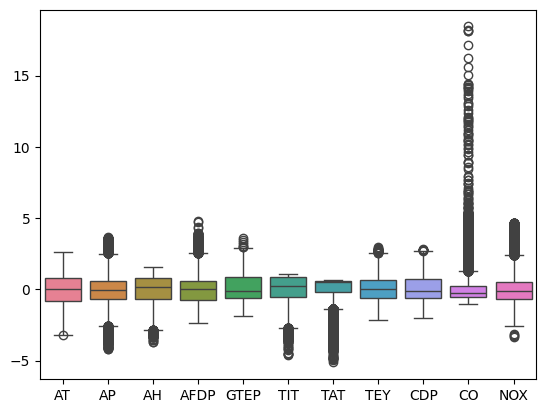

In [131]:
sns.boxplot(std_df.drop("Year",axis=1))

<Axes: >

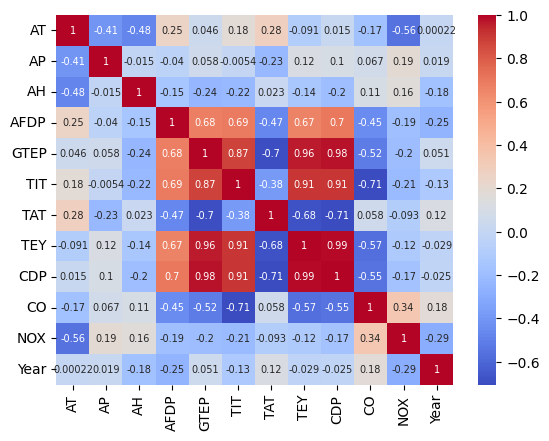

In [132]:
sns.heatmap(df.corr(), annot=True, annot_kws={"size" : 7}, cmap = 'coolwarm')

# **Model Building**

In [133]:
import pandas as pd
import numpy as np
import warnings
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import seaborn as sns
import matplotlib.pyplot as plt

## **train test set 분리**

### 2011년부터 2013년의 데이터는 train에 사용할 것이고 2014년부터 2015년 데이터는 test에 사용할 것이다.

In [134]:
df_train = df[(df["Year"] == 2011) | (df["Year"] == 2012) | (df["Year"] == 2013)]
df_test = df[(df["Year"] == 2014) | (df["Year"] == 2015)]

In [135]:
train_X = df_train.drop(["CO","NOX","Year"],axis=1)
train_X_const = sm.add_constant(train_X)
train_y_CO = df_train["CO"]
train_y_NOX = df_train["NOX"]

test_X = df_test.drop(["CO","NOX","Year"],axis=1)
test_X_const = sm.add_constant(test_X)
test_y_CO = df_test["CO"]
test_y_NOX = df_test["NOX"]

In [136]:
std = StandardScaler()
std_df_train = pd.DataFrame(std.fit_transform(df_train), columns=df.columns)
std_df_test = pd.DataFrame(std.transform(df_test), columns=df.columns)

In [137]:
std_train_X = std_df_train.drop(["CO","NOX","Year"],axis=1)
std_train_y_CO = std_df_train["CO"]
std_train_y_NOX = std_df_train["NOX"]

std_test_X = std_df_test.drop(["CO","NOX","Year"],axis=1)
std_test_y_CO = std_df_test["CO"]
std_test_y_NOX = std_df_test["NOX"]

In [138]:
df_train_out = df_out[(df_out["Year"] == 2011) | (df_out["Year"] == 2012) | (df_out["Year"] == 2013)]
df_test_out = df_out[(df_out["Year"] == 2014) | (df_out["Year"] == 2015)]

In [139]:
train_X_out = df_train_out.drop(["CO","NOX","Year"],axis=1)
train_X_out_const = sm.add_constant(train_X_out)

train_y_CO_out = df_train_out["CO"]
train_y_NOX_out = df_train_out["NOX"]

test_X_out = df_test_out.drop(["CO","NOX","Year"],axis=1)
test_X_out_const = sm.add_constant(test_X_out)
test_y_CO_out = df_test_out["CO"]
test_y_NOX_out = df_test_out["NOX"]

#### CO를 response로 두고 linear 모델 생성

In [140]:
Linear_CO = sm.OLS(std_train_y_CO, std_train_X).fit()
Linear_CO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CO   R-squared (uncentered):                   0.578
Model:                            OLS   Adj. R-squared (uncentered):              0.578
Method:                 Least Squares   F-statistic:                              3381.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:07:15   Log-Likelihood:                         -21905.
No. Observations:               22191   AIC:                                  4.383e+04
Df Residuals:                   22182   BIC:                                  4.390e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -0.1299      0.016     -8.191      0.000      -0.161      -0.099
AP            -0.0364      0.006     -6.396      0.000      -0.048      -0.025
AH             0.0415      0.006      7.283      0.000       0.030       0.053
AFDP          -0.0280      0.006     -4.589      0.000      -0.040      -0.016
GTEP          -0.3932      0.071     -5.573      0.000      -0.531      -0.255
TIT            0.2939      0.090      3.264      0.001       0.117       0.470
TAT           -0.8030      0.056    -14.286      0.000      -0.913      -0.693
TEY           -1.5761      0.092    -17.186      0.000      -1.756      -1.396
CDP            0.5414      0.082      6.576      0.000       0.380       0.703
==============================================================================
Omnibus:                    31210.146   Durbin-Watson:                   0.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19688894.972
Skew:                           8.012   Prob(JB):                         0.00
Kurtosis:                     148.042   Cond. No.                         65.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
pred_Linear_CO = Linear_CO.predict(std_test_X)
print(r2_score(std_test_y_CO, pred_Linear_CO))

0.23009431046986673


#### NOX를 response로 두고 linear 모델 생성

In [142]:
Linear_NOX = sm.OLS(std_train_y_NOX,std_train_X).fit()
Linear_NOX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    NOX   R-squared (uncentered):                   0.478
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              2259.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:07:15   Log-Likelihood:                         -24271.
No. Observations:               22191   AIC:                                  4.856e+04
Df Residuals:                   22182   BIC:                                  4.863e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.3733      0.018    -77.817      0.000      -1.408      -1.339
AP            -0.1209      0.006    -19.089      0.000      -0.133      -0.109
AH            -0.3624      0.006    -57.200      0.000      -0.375      -0.350
AFDP          -0.0183      0.007     -2.693      0.007      -0.032      -0.005
GTEP           0.4901      0.078      6.244      0.000       0.336       0.644
TIT            1.4934      0.100     14.906      0.000       1.297       1.690
TAT           -0.4398      0.063     -7.034      0.000      -0.562      -0.317
TEY           -3.2957      0.102    -32.303      0.000      -3.496      -3.096
CDP            0.8349      0.092      9.115      0.000       0.655       1.014
==============================================================================
Omnibus:                     4604.444   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17464.259
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       6.856   Cond. No.                         65.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
pred_Linear_NOX = Linear_NOX.predict(std_test_X)
print(r2_score(std_test_y_NOX,pred_Linear_NOX))

0.05884492981277556


## **가정 검정**

#### 선형성 검정

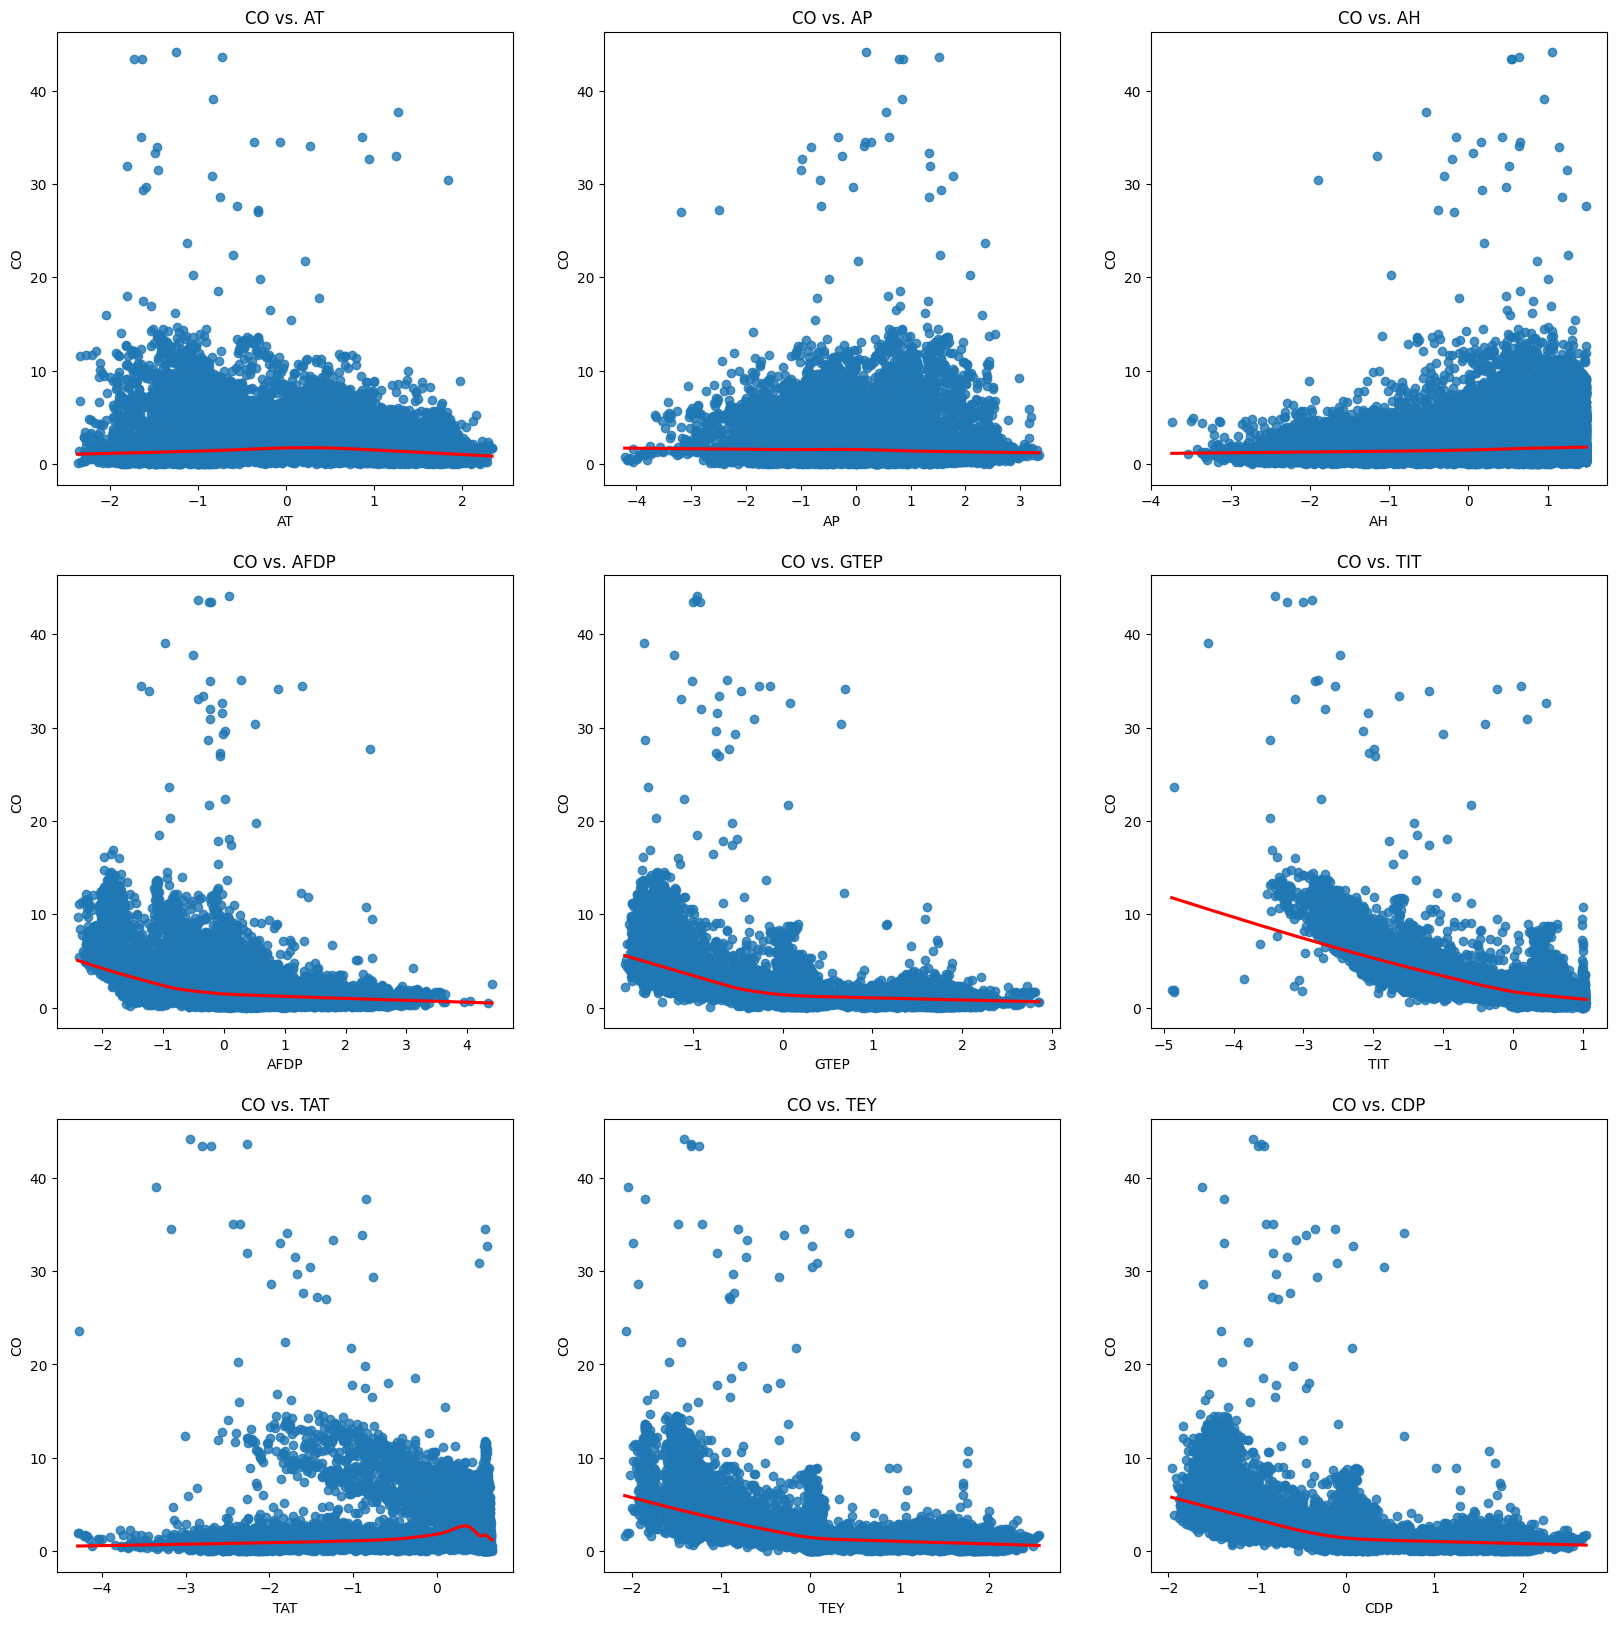

In [144]:
# X와 Y가 선형 관계를 가지냐? 선형 관계 안 가지면 X 변환하기
plt.figure(figsize=(20,20))
for k, i in enumerate(train_X.columns):
    ax = plt.subplot(3, 3, k+1)
    sns.regplot(x = std_train_X[i], y = train_y_CO , lowess=True, line_kws = dict(color='r'))
    plt.title('CO vs. '+i)
    plt.xlabel(i)
    plt.ylabel('CO')
plt.show()

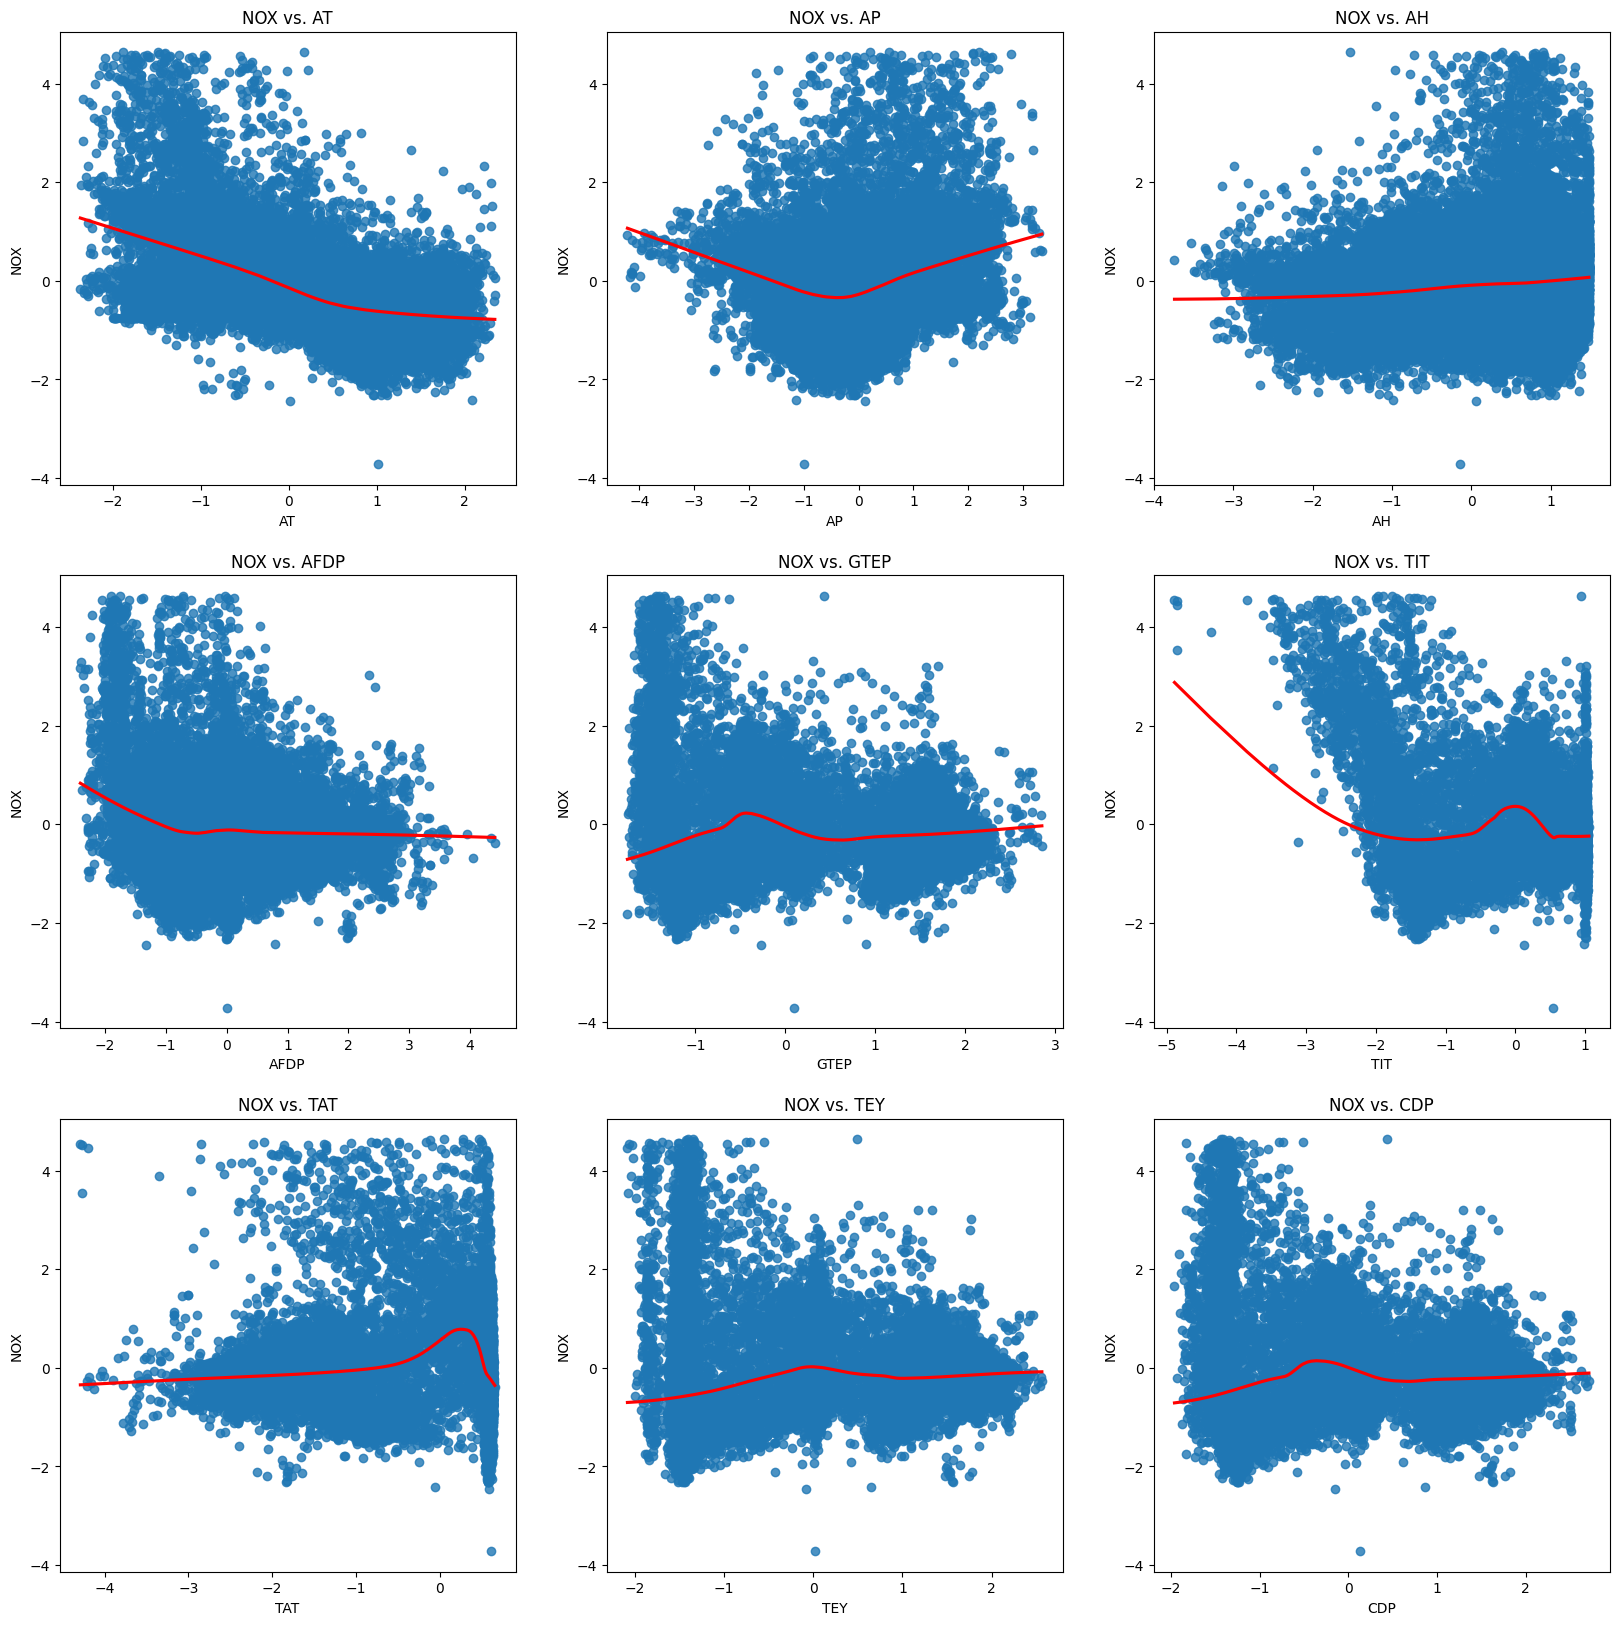

In [145]:
plt.figure(figsize=(20,20))
for k, i in enumerate(train_X.columns):
    ax = plt.subplot(3, 3, k+1)
    sns.regplot(x = std_train_X[i], y = std_train_y_NOX , lowess=True, line_kws = dict(color='r'))
    plt.title('NOX vs. '+i)
    plt.xlabel(i)
    plt.ylabel('NOX')
plt.show()

#### 정규성 검정

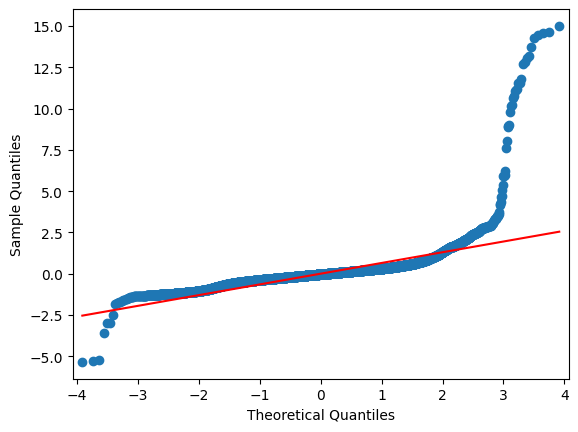

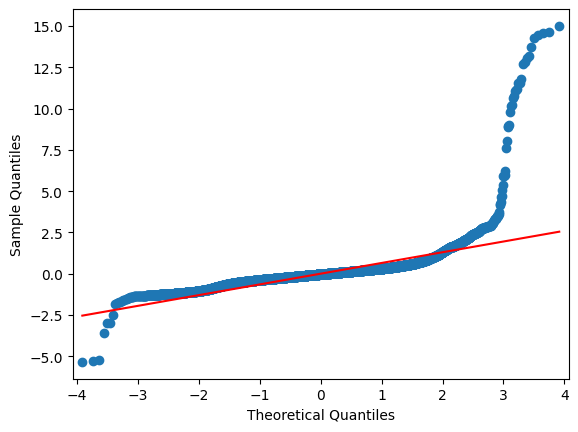

In [146]:
# residual이 정규분포이냐? QQ플랏과 그려보기: L(W5_2 p10)
sm.qqplot(Linear_CO.resid,line='s')

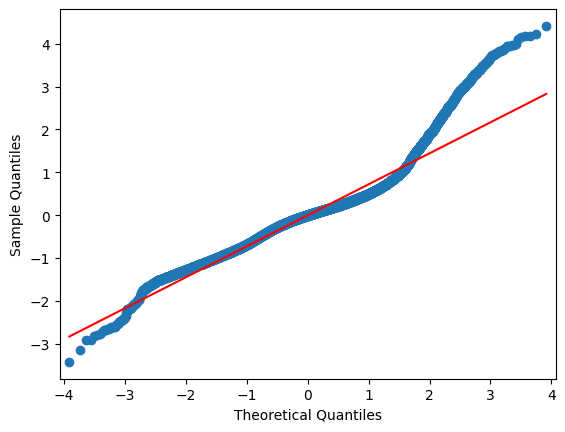

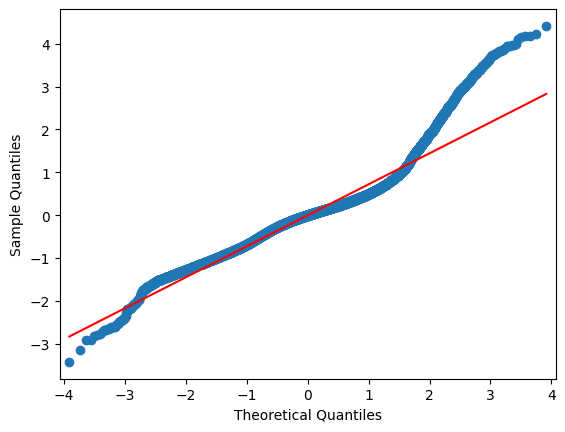

In [147]:
sm.qqplot(Linear_NOX.resid, line='s')

#### 이분산성 검정

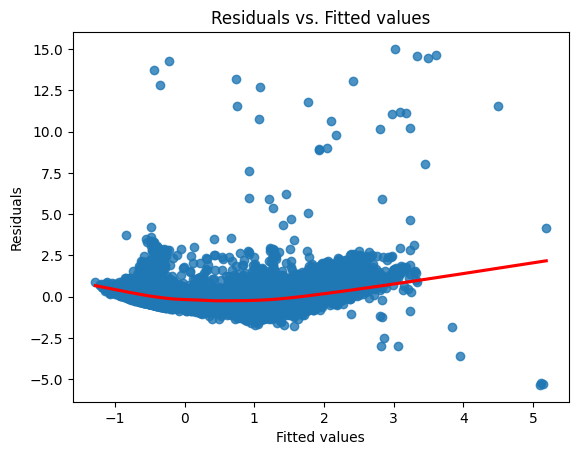

In [148]:
# residual과 각각의 X의 scatter플랏을 그려보고 이분산성이 있다면 변수 변환으로 이분산성 제거하기(변환 방법 : W7_2, W8_1)
sns.regplot(x = Linear_CO.fittedvalues, y = Linear_CO.resid,lowess=True,line_kws = dict(color='r'))
plt.title('Residuals vs. Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

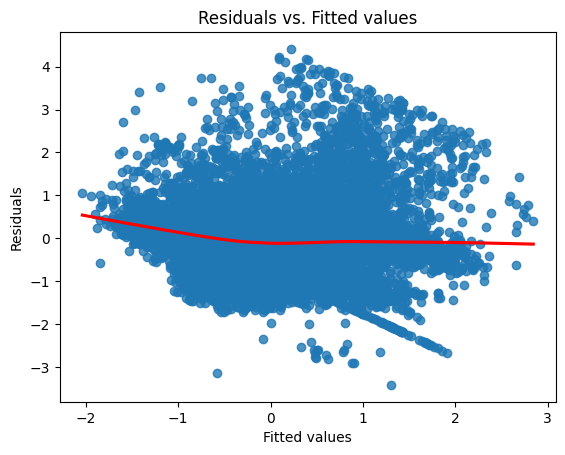

In [149]:
sns.regplot(x = Linear_NOX.fittedvalues, y = Linear_NOX.resid,lowess=True, line_kws = dict(color='r'))
plt.title('Residuals vs. Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

**GTEP, TIT, TAT, TEY, CDP는 response를 NOX로 하였을 때 residual plot에서 2차 모양의 패턴이 보임**

#### autocorrelation 검정

In [150]:
# 더빗 왓슨 통계량을 보고 residual vs 각각의 X scatter 플랏에서 패턴이 있는지 보면 알 수 있다. -> 존재한다면 자기상관 매개변수로 변수 변환.(W10_1 p10,p15)
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(Linear_CO.resid,axis=0)

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation')
    print('Assumption satisfied')

Durbin-Watson: 0.9901980873101183
Signs of positive autocorrelation
Assumption not satisfied


#### multicorrelation 검정

In [151]:
# VIF값(10이상)과 Condition indices값(15이상 or 30이상), PCA 보고 변수간에 어떤 관계가 있는지 보기 -> 서로 관계성이 있는 변수 합치기 or PCA변수 몇개 제거하기(W10_2,W11_1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [152]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.drop("Year",axis=1).values, i) for i in range(df.drop("Year",axis =1).shape[1])]
vif["features"] = df.drop("Year",axis=1).columns

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,159281.817018,TIT
1,74704.277834,TAT
2,30352.060538,AP
3,28956.592730,CDP
4,15423.355695,TEY
5,1070.249450,GTEP
6,74.070593,NOX
7,66.819718,AFDP
8,63.038141,AT
9,50.633615,AH


### Leverage 확인

Text(0.5, 1.0, 'leverage')

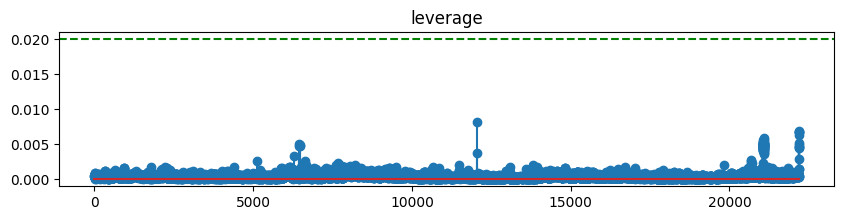

In [153]:
influence=Linear_CO.get_influence() # 영향도 값
hat=influence.hat_matrix_diag # 레버리지 벡터의 값
plt.figure(figsize=(10,2))
plt.stem(hat) # 가로폭이 없는 그래프
plt.axhline(0.02, c='g', ls='--')
plt.title('leverage')

Text(0.5, 1.0, 'leverage')

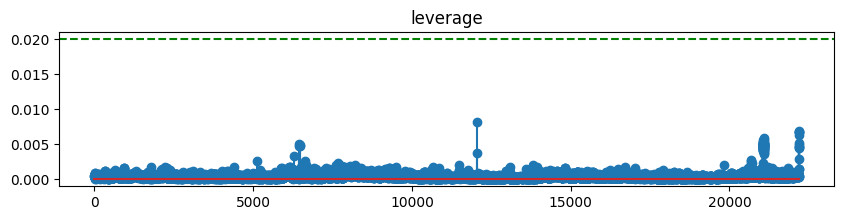

In [154]:
influence=Linear_NOX.get_influence() # 영향도 값
hat=influence.hat_matrix_diag # 레버리지 벡터의 값
plt.figure(figsize=(10,2))
plt.stem(hat) # 가로폭이 없는 그래프
plt.axhline(0.02, c='g', ls='--')
plt.title('leverage')

## Variable selection

### PCA

In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [156]:
pca = PCA(n_components=train_X.shape[1])  # Adjust the number of components
principalComponents = pca.fit_transform(std_train_X)
pc_columns = ["PC" + str(i) for i in range(1, pca.n_components_ + 1)]
principalDf = pd.DataFrame(data=principalComponents, columns=pc_columns)

In [157]:
eigenvectors = pca.components_
eigenvalue = pca.explained_variance_

In [158]:
for i in range(9):
    print("PC"+str(i+1)+":")
    print(eigenvalue[i])
    print(eigenvalue[i]/sum(eigenvalue))
    print(" + ".join(["".join([str(round(x, 3)), "X", str(ind+1)]) for ind, x in enumerate(eigenvectors[i])]), "~= 0")

PC1:
4.9227916073096605
0.5469521966673238
-0.041X1 + 0.089X2 + -0.097X3 + 0.337X4 + 0.446X5 + 0.397X6 + -0.34X7 + 0.442X8 + 0.447X9 ~= 0
PC2:
1.8350405146372846
0.20388420240338323
0.676X1 + -0.355X2 + -0.548X3 + 0.158X4 + 0.019X5 + 0.157X6 + 0.25X7 + -0.068X8 + -0.008X9 ~= 0
PC3:
0.9221442690516329
0.10245585713054697
-0.053X1 + -0.854X2 + 0.5X3 + 0.018X4 + 0.075X5 + 0.063X6 + -0.005X7 + 0.08X8 + 0.047X9 ~= 0
PC4:
0.559268278455604
0.06213811955262062
-0.045X1 + -0.24X2 + -0.332X3 + 0.103X4 + 0.011X5 + -0.54X6 + -0.712X7 + -0.132X8 + -0.051X9 ~= 0
PC5:
0.46666863336414477
0.05184973374766727
0.084X1 + 0.137X2 + 0.289X3 + 0.893X4 + -0.135X5 + -0.14X6 + 0.088X7 + -0.163X8 + -0.144X9 ~= 0
PC6:
0.28805701273265055
0.032004892436560906
-0.711X1 + -0.246X2 + -0.496X3 + 0.229X4 + -0.138X5 + 0.098X6 + 0.309X7 + 0.068X8 + -0.077X9 ~= 0
PC7:
0.003179688623643818
0.0003532828151485649
-0.092X1 + 0.02X2 + -0.01X3 + -0.004X4 + 0.84X5 + -0.045X6 + 0.133X7 + -0.276X8 + -0.435X9 ~= 0
PC8:
0.00211339

<function matplotlib.pyplot.show(close=None, block=None)>

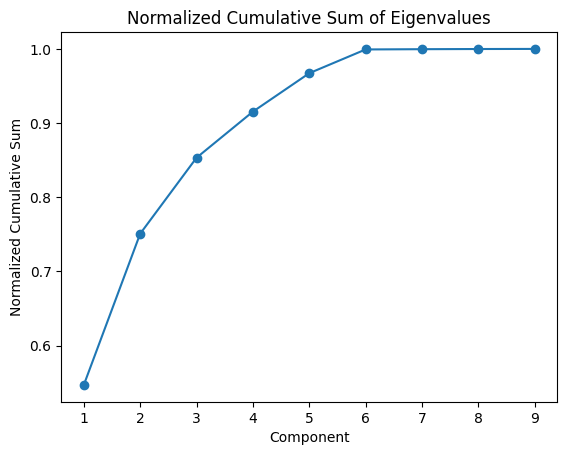

In [159]:
cumulative_sum = np.cumsum(eigenvalue)
normalized_cumulative_sum = cumulative_sum / np.sum(eigenvalue)

# Plot the normalized cumulative sum on the third subplot
plt.plot(range(1, len(eigenvalue) + 1), normalized_cumulative_sum, marker='o')
plt.xlabel('Component')
plt.ylabel('Normalized Cumulative Sum')
plt.title('Normalized Cumulative Sum of Eigenvalues')
plt.show

In [160]:
pca_train_X = principalDf[["PC1","PC2","PC3","PC4","PC5","PC6"]]

In [161]:
PCA_model_CO = sm.OLS(std_train_y_CO, pca_train_X).fit()
PCA_model_CO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CO   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.573
Method:                 Least Squares   F-statistic:                              4965.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:11:14   Log-Likelihood:                         -22041.
No. Observations:               22191   AIC:                                  4.409e+04
Df Residuals:                   22185   BIC:                                  4.414e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.2510      0.002   -126.969      0.000      -0.255      -0.247
PC2           -0.1618      0.003    -49.960      0.000      -0.168      -0.155
PC3           -0.0492      0.005    -10.769      0.000      -0.058      -0.040
PC4            0.5866      0.006    100.008      0.000       0.575       0.598
PC5            0.0914      0.006     14.231      0.000       0.079       0.104
PC6           -0.2390      0.008    -29.247      0.000      -0.255      -0.223
==============================================================================
Omnibus:                    31395.682   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20233676.759
Skew:                           8.102   Prob(JB):                         0.00
Kurtosis:                     150.039   Cond. No.                         4.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
pca_test_data = pca.transform(std_test_X)
principalDf_test = pd.DataFrame(data=pca_test_data, columns=pc_columns)
pca_test_X = principalDf_test[["PC1","PC2","PC3","PC4","PC5","PC6"]]

In [163]:
pred_PCA_train_CO = PCA_model_CO.predict(pca_train_X)
print(r2_score(std_train_y_CO, pred_PCA_train_CO))

0.5731809077858357


In [164]:
pred_PCA_test_CO = PCA_model_CO.predict(pca_test_X)
print(r2_score(std_test_y_CO, pred_PCA_test_CO))

0.4556596331418219


In [165]:
PCA_model_NOX = sm.OLS(std_train_y_NOX, pca_train_X).fit()
PCA_model_NOX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    NOX   R-squared (uncentered):                   0.452
Model:                            OLS   Adj. R-squared (uncentered):              0.451
Method:                 Least Squares   F-statistic:                              3045.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:11:14   Log-Likelihood:                         -24822.
No. Observations:               22191   AIC:                                  4.966e+04
Df Residuals:                   22185   BIC:                                  4.970e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PC1           -0.0476      0.002    -21.246      0.000      -0.052      -0.043
PC2           -0.3403      0.004    -92.703      0.000      -0.347      -0.333
PC3           -0.0962      0.005    -18.573      0.000      -0.106      -0.086
PC4            0.1124      0.007     16.903      0.000       0.099       0.125
PC5           -0.1505      0.007    -20.684      0.000      -0.165      -0.136
PC6            0.8370      0.009     90.355      0.000       0.819       0.855
==============================================================================
Omnibus:                     4686.764   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16430.154
Skew:                           1.045   Prob(JB):                         0.00
Kurtosis:                       6.661   Cond. No.                         4.13
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
pred_PCA_train_NOX = PCA_model_NOX.predict(pca_train_X)
print(r2_score(std_train_y_NOX, pred_PCA_train_NOX))

0.4515811848556548


In [167]:
pred_PCA_test_NOX = PCA_model_NOX.predict(pca_test_X)
print(r2_score(std_test_y_NOX, pred_PCA_test_NOX))

-0.48800976039202504


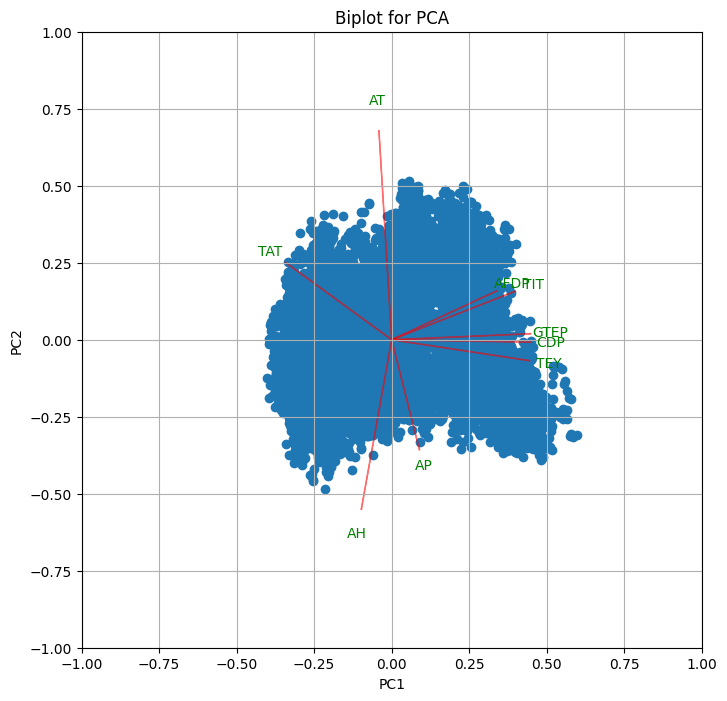

In [168]:
# (1) 각 PC축에 가깝게 평행을 이루는 변수가 해당 PC에 영향을 가장 많이 주는 변수.
# (2) 각 빨간선의 길이는 원변수의 분산을 표현, 길이가 길수록 분산이 길다.
# (3) 각 빨간선이 가까울수록 서로 상관관계가 있다. (반대로 서로 거리가 멀수록 상관관계가 적다.)

def biplot(score, coeff, pcax, pcay, labels=None):
    pca1 = pcax - 1
    pca2 = pcay - 1
    xs = score[:, pca1]
    ys = score[:, pca2]
    n = score.shape[1]

    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.figure(figsize=(8, 8))
    plt.scatter(xs * scalex, ys * scaley)

    for i in range(n):
        plt.arrow(0, 0, coeff[i, pca1], coeff[i, pca2], color='r', alpha=0.5)

        if labels is None:
            plt.text(coeff[i, pca1] * 1.15, coeff[i, pca2] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, pca1] * 1.15, coeff[i, pca2] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.title("Biplot for PCA")
    plt.grid(True)
    plt.show()

biplot(principalComponents, pca.components_.T, 1, 2, labels=df_train.columns)


### Lasso ridge

In [169]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
import sklearn.metrics as mt

In [170]:
alphas_CO = np.logspace(-4, 10, 100)
coefs_lasso = []
coefs_ridge = []
max_test_r2_lasso = 0
max_test_r2_ridge = 0

for a in alphas_CO:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(std_train_X, std_train_y_CO)
    coefs_lasso.append(lasso.coef_)
    y_CO_pred_lasso = lasso.predict(std_test_X)
    if max_test_r2_lasso<mt.r2_score(std_test_y_CO, y_CO_pred_lasso):
        max_test_r2_lasso = mt.r2_score(std_test_y_CO, y_CO_pred_lasso)
        coef_max_lasso = lasso.coef_
        max_alpha_lasso = a


    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(std_train_X, std_train_y_CO)
    coefs_ridge.append(ridge.coef_)
    y_CO_pred_ridge = ridge.predict(std_test_X)
    if max_test_r2_ridge<mt.r2_score(std_test_y_CO, y_CO_pred_ridge):
        max_test_r2_ridge = mt.r2_score(std_test_y_CO, y_CO_pred_ridge)
        coef_max_ridge = ridge.coef_
        max_alpha_ridge = a

c:\Users\youai\anaconda3\envs\Data_sci\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.833e+03, tolerance: 2.219e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\youai\anaconda3\envs\Data_sci\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.200e+03, tolerance: 2.219e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\youai\anaconda3\envs\Data_sci\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [171]:
max_test_r2_lasso, max_alpha_lasso, coef_max_lasso

(0.4905452993675625,
 0.013219411484660288,
 array([ 0.02115468,  0.        ,  0.        , -0.        , -0.        ,
        -0.79159793, -0.19612412, -0.        , -0.        ]))

lasso test r2 = 0.4867709538515347 a = 0.34304692863149155 coef = [ 0. ,  0.00333852,  0. ,  0.  , -0.   , 0.  , -0.10785682, -0.05547935, -0. ,  0. ]

In [172]:
max_test_r2_ridge,max_alpha_ridge, coef_max_ridge

(0.457011690194739,
 1629.7508346206434,
 array([ 0.02231937,  0.00447675,  0.03180149, -0.02839404, -0.10306749,
        -0.42470372, -0.37961293, -0.22549071, -0.11016114]))

ridge test r2 = 0.4777104829772383 a = 112332.40329780265 coef = [ 0.,  0.00758689,  0.00308235,  0.00502755, -0.00328563, 0.00448754, -0.08830649, -0.07826605, -0.02721374,0.00151869]

In [173]:
df_lasso = pd.DataFrame(coefs_lasso)
df_lasso.index = alphas_CO
df_ridge = pd.DataFrame(coefs_ridge)
df_ridge.index = alphas_CO

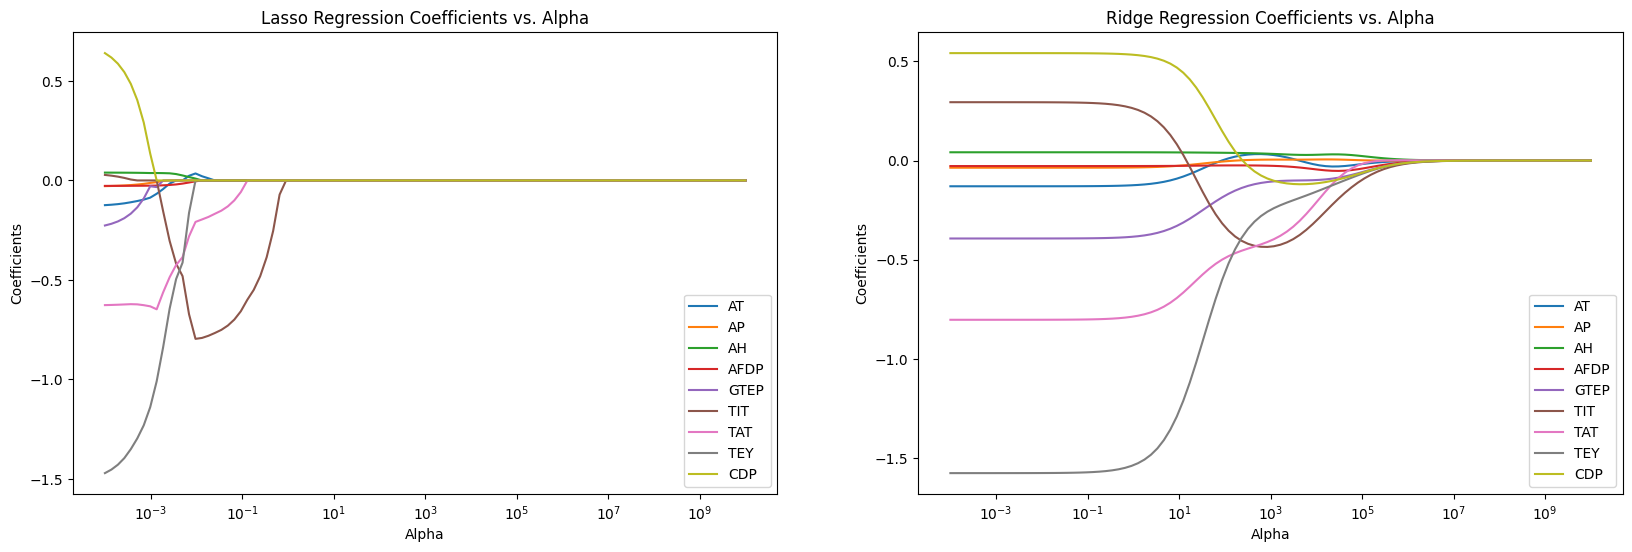

In [174]:
# Creating a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Lasso plot
axs[0].plot(alphas_CO, coefs_lasso)
axs[0].set_xscale('log')
axs[0].set_xlabel('Alpha')
axs[0].set_ylabel('Coefficients')
axs[0].set_title('Lasso Regression Coefficients vs. Alpha')
axs[0].axis('tight')
axs[0].legend(train_X.columns, loc='best')
# Ridge plot
axs[1].plot(alphas_CO, coefs_ridge)
axs[1].set_xscale('log')
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('Coefficients')
axs[1].set_title('Ridge Regression Coefficients vs. Alpha')
axs[1].axis('tight')
axs[1].legend(train_X.columns, loc='best')
# Show the plots
plt.show()


In [175]:
alphas = np.logspace(-4, 6, 100)
coefs_lasso_NOX = []
coefs_ridge_NOX = []
max_test_r2_lasso_NOX = -1000000
max_test_r2_ridge_NOX = -1000000

for a in alphas:
    lasso_NOX = Lasso(alpha=a, fit_intercept=True)
    lasso_NOX.fit(std_train_X, std_train_y_NOX)
    coefs_lasso_NOX.append(lasso_NOX.coef_)
    y_NOX_pred_lasso = lasso_NOX.predict(std_test_X)
    if max_test_r2_lasso_NOX<mt.r2_score(std_test_y_NOX, y_NOX_pred_lasso):
        max_test_r2_lasso_NOX = mt.r2_score(std_test_y_NOX, y_NOX_pred_lasso)
        coef_max_lasso_NOX = lasso_NOX.coef_
        max_alpha_lasso_NOX = a


    ridge_NOX = Ridge(alpha=a, fit_intercept=True)
    ridge_NOX.fit(std_train_X, std_train_y_NOX)
    coefs_ridge_NOX.append(ridge_NOX.coef_)
    y_NOX_pred_ridge = ridge_NOX.predict(std_test_X)
    if max_test_r2_ridge_NOX<mt.r2_score(std_test_y_NOX, y_NOX_pred_ridge):
        max_test_r2_ridge_NOX = mt.r2_score(std_test_y_NOX, y_NOX_pred_ridge)
        coef_max_ridge_NOX = ridge_NOX.coef_
        max_alpha_ridge_NOX = a

c:\Users\youai\anaconda3\envs\Data_sci\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.877e+03, tolerance: 2.219e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\youai\anaconda3\envs\Data_sci\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.640e+03, tolerance: 2.219e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\youai\anaconda3\envs\Data_sci\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

In [176]:
max_test_r2_lasso_NOX, max_alpha_lasso_NOX, coef_max_lasso_NOX

(-0.2841568534829646,
 0.08497534359086438,
 array([-0.56070402,  0.        , -0.09170235, -0.        , -0.10317196,
        -0.        ,  0.        , -0.        , -0.        ]))

0.10194894013447653, 0.14873521072935117, [ 0., -1.72371308, -0.15807391, -0.28084714, -0., 0.44112471,  0.81429133, -0.67408667, -1.32502168,  0.]

In [177]:
max_test_r2_ridge_NOX, max_alpha_ridge_NOX, coef_max_ridge_NOX

(0.058842548266778816,
 0.0001,
 array([-1.37330795, -0.12093217, -0.36235113, -0.01828768,  0.4900735 ,
         1.49342121, -0.439838  , -3.29568131,  0.83488289]))

-0.4499437854459625 , 1e-10, [ 0., -2.06128041, -0.20864844, -0.28738668, -0.24910128, 1.2773675 ,  0.97868566, -0.62970208, -2.26954708,  8.26910437]

In [178]:
df_lasso = pd.DataFrame(coefs_lasso_NOX)
df_lasso.index = alphas
df_ridge = pd.DataFrame(coefs_ridge_NOX)
df_ridge.index = alphas

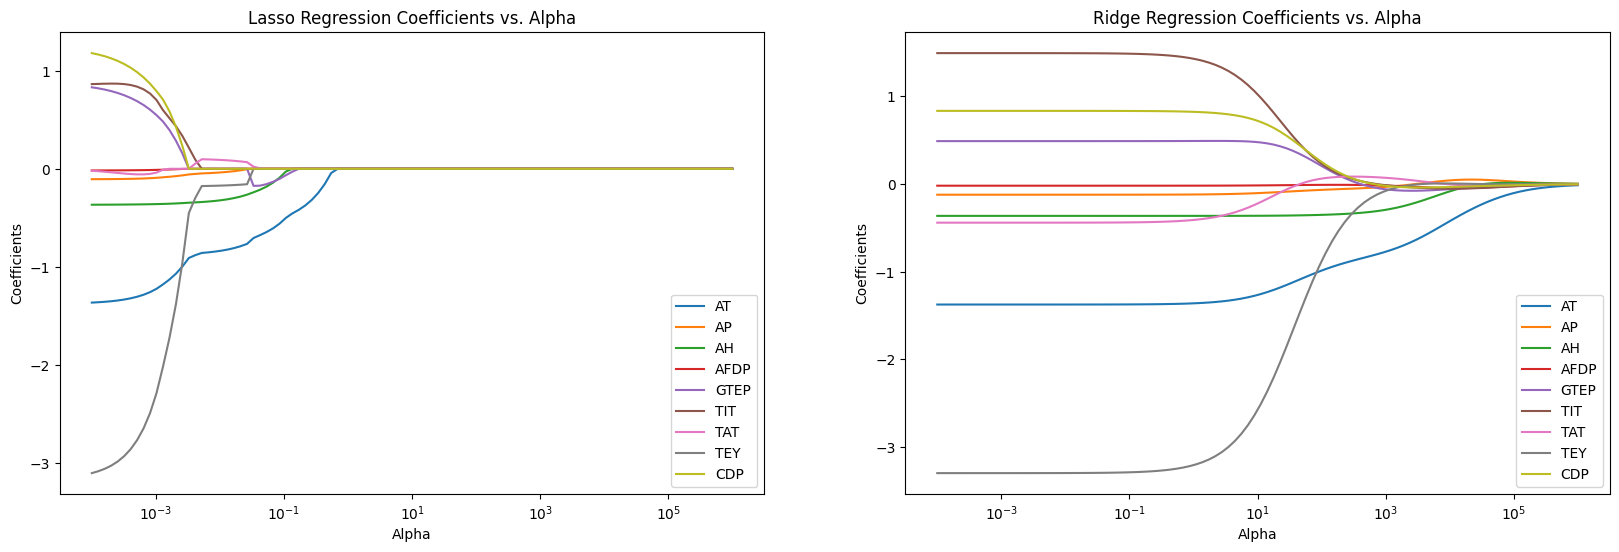

In [179]:
# Creating a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Lasso plot
axs[0].plot(alphas, coefs_lasso_NOX)
axs[0].set_xscale('log')
axs[0].set_xlabel('Alpha')
axs[0].set_ylabel('Coefficients')
axs[0].set_title('Lasso Regression Coefficients vs. Alpha')
axs[0].axis('tight')
axs[0].legend(train_X.columns, loc='best')
# Ridge plot
axs[1].plot(alphas, coefs_ridge_NOX)
axs[1].set_xscale('log')
axs[1].set_xlabel('Alpha')
axs[1].set_ylabel('Coefficients')
axs[1].set_title('Ridge Regression Coefficients vs. Alpha')
axs[1].axis('tight')
axs[1].legend(train_X.columns, loc='best')
# Show the plots
plt.show()

# **새로운 모델의 가정 검정**

### transforms

In [180]:
std = StandardScaler()
train_X_trans = train_X.copy()
train_X_trans["AH"] = train_X["AH"]**(1/2)
train_X_trans["GTEP"] = train_X["GTEP"]**2
train_X_trans["TIT"] = train_X["TIT"]**(1/4)

train_X_trans = pd.DataFrame(std.fit_transform(train_X_trans),columns=train_X.columns)

In [181]:
test_X_trans = test_X.copy()
test_X_trans["AH"] = test_X["AH"]**(1/2)
test_X_trans["GTEP"] = test_X["GTEP"]**2
test_X_trans["TIT"] = test_X["TIT"]**(1/4)

test_X_trans = pd.DataFrame(std.transform(test_X_trans),columns=test_X.columns)

In [182]:
Linear_trans_NOX = sm.OLS(std_train_y_NOX,train_X_trans).fit()
Linear_trans_NOX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    NOX   R-squared (uncentered):                   0.485
Model:                            OLS   Adj. R-squared (uncentered):              0.485
Method:                 Least Squares   F-statistic:                              2325.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):                        0.00
Time:                        17:12:04   Log-Likelihood:                         -24117.
No. Observations:               22191   AIC:                                  4.825e+04
Df Residuals:                   22182   BIC:                                  4.832e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.1902      0.017    -69.843      0.000      -1.224      -1.157
AP            -0.1621      0.006    -26.334      0.000      -0.174      -0.150
AH            -0.3471      0.006    -55.308      0.000      -0.359      -0.335
AFDP          -0.0082      0.007     -1.224      0.221      -0.021       0.005
GTEP          -1.2102      0.058    -20.894      0.000      -1.324      -1.097
TIT            1.7903      0.095     18.915      0.000       1.605       1.976
TAT           -0.9982      0.060    -16.502      0.000      -1.117      -0.880
TEY           -2.7725      0.101    -27.374      0.000      -2.971      -2.574
CDP            1.3418      0.091     14.810      0.000       1.164       1.519
==============================================================================
Omnibus:                     4355.826   Durbin-Watson:                   0.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14477.796
Skew:                           0.988   Prob(JB):                         0.00
Kurtosis:                       6.428   Cond. No.                         64.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
pred_trans_NOX = Linear_trans_NOX.predict(test_X_trans)
print(r2_score(std_test_y_NOX, pred_trans_NOX))

0.24723049108745232


In [184]:
alphas = np.logspace(-2, 1, 100)
coefs_lasso_NOX_trans = []
coefs_ridge_NOX_trans = []
max_r2_lasso_NOX_trans = -1000000
max_r2_ridge_NOX_trans = -1000000

for a in alphas:
    lasso_NOX_trans = Lasso(alpha=a, fit_intercept=True)
    lasso_NOX_trans.fit(train_X_trans, std_train_y_NOX)
    coefs_lasso_NOX_trans.append(lasso_NOX_trans.coef_)
    y_NOX_pred_lasso_trans = lasso_NOX_trans.predict(test_X_trans)
    if max_r2_lasso_NOX_trans<mt.r2_score(std_test_y_NOX, y_NOX_pred_lasso_trans):
        max_r2_lasso_NOX_trans = mt.r2_score(std_test_y_NOX, y_NOX_pred_lasso_trans)
        coef_max_lasso_NOX_trans = lasso_NOX_trans.coef_
        max_alpha_lasso_NOX_trans = a

In [185]:
max_r2_lasso_NOX_trans, max_alpha_lasso_NOX_trans, coef_max_lasso_NOX_trans

(-0.283376356046952,
 0.093260334688322,
 array([-0.54708967,  0.        , -0.07694199, -0.        , -0.10105051,
        -0.        ,  0.        , -0.        , -0.        ]))

# **Model Evaluation**

## target : **CO**

In [186]:
lasso_CO_Max = Lasso(alpha=max_alpha_lasso, fit_intercept=True).fit(std_train_X, std_train_y_CO)
max_train_pred_lasso_CO = lasso_CO_Max.predict(std_train_X)
max_train_r2_lasso = r2_score(std_train_y_CO, max_train_pred_lasso_CO)

In [187]:
ridge_CO_Max = Ridge(alpha=max_alpha_ridge, fit_intercept=True).fit(std_train_X,std_train_y_CO)
max_train_pred_ridge_CO = ridge_CO_Max.predict(std_train_X)
max_train_r2_ridge = r2_score(std_train_y_CO, max_train_pred_ridge_CO)

In [188]:
print(f"original >> train R2-squared : {Linear_CO.rsquared:.3}, test R2-squared : {r2_score(test_y_CO,pred_Linear_CO):.3}")
print(f"PCA >> train R2-squared : {r2_score(std_train_y_CO, pred_PCA_train_CO):.3}, test R2-squared : {r2_score(std_test_y_CO, pred_PCA_test_CO):.3}")
print(f"Lasso >> train R2-squared : {max_train_r2_lasso:.3}, test R2-squared : {max_test_r2_lasso:.3}")
print(f"Ridge >> train R2-squared : {max_train_r2_ridge:.3}, test R2-squared : {max_test_r2_ridge:.3}")

original >> train R2-squared : 0.578, test R2-squared : -1.38
PCA >> train R2-squared : 0.573, test R2-squared : 0.456
Lasso >> train R2-squared : 0.569, test R2-squared : 0.491
Ridge >> train R2-squared : 0.57, test R2-squared : 0.457


In [189]:
data_Performance_CO = {"train R2-squared" : [Linear_CO.rsquared, r2_score(std_train_y_CO, pred_PCA_train_CO), max_train_r2_lasso, max_train_r2_ridge],
                  "test R2-squared" : [r2_score(test_y_CO,pred_Linear_CO), r2_score(std_test_y_CO, pred_PCA_test_CO), max_test_r2_lasso, max_test_r2_ridge]}
Performance_CO = pd.DataFrame(data_Performance_CO, index = ['original', 'PCA', 'Lasso', 'Ridge'])

Performance_CO

,train R2-squared,test R2-squared
original,0.578371,-1.377104
PCA,0.573181,0.455660
Lasso,0.569360,0.490545
Ridge,0.569931,0.457012


### model selection : lasso

In [190]:
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)

In [191]:
CO_final_model = Lasso(alpha=max_alpha_lasso).fit(std_train_X,std_train_y_CO)

results_CO_reg = regression_analysis(std_train_X,std_train_y_CO,CO_final_model)
results_CO_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3258.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:12:06   Log-Likelihood:                -22140.
No. Observations:               22191   AIC:                         4.430e+04
Df Residuals:                   22181   BIC:                         4.438e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.701e-15      0.004   1.75e-12      1.000      -0.009       0.009
AT             0.0212      0.016      1.319      0.187      -0.010       0.053
AP                  0      0.006          0      1.000      -0.011       0.011
AH                  0      0.006          0      1.000      -0.011       0.011
AFDP               -0      0.006         -0      1.000      -0.012       0.012
GTEP               -0      0.071         -0      1.000      -0.140       0.140
TIT           -0.7916      0.091     -8.697      0.000      -0.970      -0.613
TAT           -0.1961      0.057     -3.452      0.001      -0.307      -0.085
TEY                -0      0.093         -0      1.000      -0.182       0.182
CDP                -0      0.083         -0      1.000      -0.163       0.163
==============================================================================
Omnibus:                    31790.765   Durbin-Watson:                   0.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20996944.837
Skew:                           8.305   Prob(JB):                         0.00
Kurtosis:                     152.775   Cond. No.                         65.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

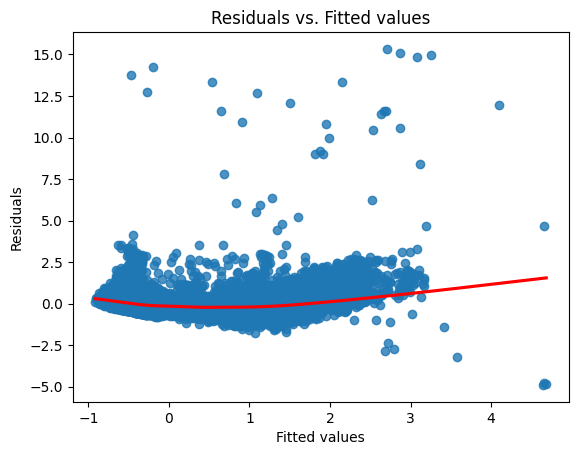

In [192]:
sns.regplot(x = CO_final_model.predict(std_train_X), y = [std_train_y_CO-CO_final_model.predict(std_train_X)],lowess=True, line_kws = dict(color='r'))
plt.title('Residuals vs. Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

### target : **NOX**

In [193]:
lasso_NOX_trans = Lasso(alpha=max_alpha_lasso_NOX_trans, fit_intercept=True).fit(train_X_trans,std_train_y_NOX)
max_train_pred_lasso_NOX_trans = lasso_NOX_trans.predict(train_X_trans)
max_train_r2_lasso_NOX_trans = r2_score(std_train_y_NOX, max_train_pred_lasso_NOX_trans)

In [194]:
lasso_NOX_Max = Lasso(alpha=max_alpha_lasso_NOX, fit_intercept=True).fit(std_train_X,std_train_y_NOX)
max_train_pred_lasso_NOX = lasso_NOX_Max.predict(std_train_X)
max_train_r2_lasso_NOX = r2_score(std_train_y_NOX, max_train_pred_lasso_NOX)

In [195]:
print(f"original >> train R2-squared : {Linear_NOX.rsquared:.3}, test R2-squared : {r2_score(test_y_NOX,pred_Linear_NOX):.3}")
print(f"PCA >> train R2-squared : {r2_score(std_train_y_NOX, pred_PCA_train_NOX):.3}, test R2-squared : {r2_score(std_test_y_NOX, pred_PCA_test_NOX):.3}")
print(f"Lasso >> train R2-squared : {max_train_r2_lasso_NOX:.3}, test R2-squared : {max_test_r2_lasso_NOX:.3}")
print(f"Lasso_trans >> train R2-squared : {max_train_r2_lasso_NOX_trans:.3}, test R2-squared : {max_r2_lasso_NOX_trans:.3}")

original >> train R2-squared : 0.478, test R2-squared : -32.3
PCA >> train R2-squared : 0.452, test R2-squared : -0.488
Lasso >> train R2-squared : 0.395, test R2-squared : -0.284
Lasso_trans >> train R2-squared : 0.392, test R2-squared : -0.283


In [196]:
data_Performance_NOX = {"train R2-squared" : [Linear_NOX.rsquared, r2_score(std_train_y_NOX, pred_PCA_train_NOX), max_train_r2_lasso_NOX,max_train_r2_lasso_NOX_trans],
                  "test R2-squared" : [r2_score(test_y_NOX,pred_Linear_NOX), r2_score(std_test_y_NOX, pred_PCA_test_NOX), max_test_r2_lasso_NOX,max_r2_lasso_NOX_trans]}
Performance_NOX = pd.DataFrame(data_Performance_NOX, index = ['original', 'PCA', 'Lasso','Lasso_trans'])

Performance_NOX

,train R2-squared,test R2-squared
original,0.478184,-32.341004
PCA,0.451581,-0.488010
Lasso,0.394750,-0.284157
Lasso_trans,0.391922,-0.283376


### model selection : lasso

In [197]:
NOX_final_model = Lasso(alpha=max_alpha_lasso_NOX_trans).fit(train_X_trans,std_train_y_NOX)

results_NOX_reg = regression_analysis(train_X_trans,std_train_y_NOX,NOX_final_model)
results_NOX_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1588.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:12:34   Log-Likelihood:                -25968.
No. Observations:               22191   AIC:                         5.196e+04
Df Residuals:                   22181   BIC:                         5.204e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.324e-16      0.005  -1.21e-13      1.000      -0.010       0.010
AT            -0.5471      0.019    -29.534      0.000      -0.583      -0.511
AP                  0      0.007          0      1.000      -0.013       0.013
AH            -0.0769      0.007    -11.280      0.000      -0.090      -0.064
AFDP               -0      0.007         -0      1.000      -0.014       0.014
GTEP          -0.1011      0.063     -1.605      0.109      -0.224       0.022
TIT                -0      0.103         -0      1.000      -0.202       0.202
TAT                 0      0.066          0      1.000      -0.129       0.129
TEY                -0      0.110         -0      1.000      -0.216       0.216
CDP                -0      0.098         -0      1.000      -0.193       0.193
==============================================================================
Omnibus:                     4839.439   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14928.675
Skew:                           1.121   Prob(JB):                         0.00
Kurtosis:                       6.334   Cond. No.                         64.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

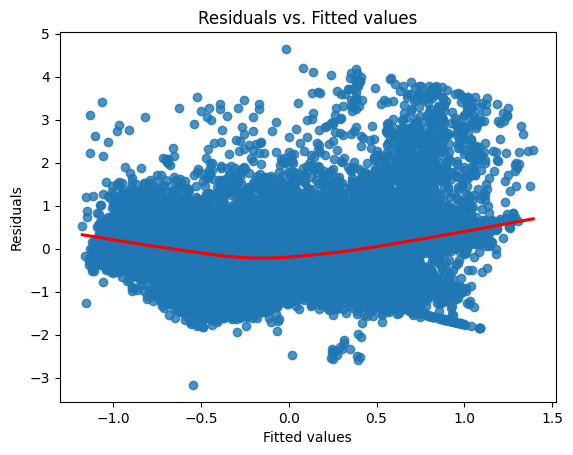

In [198]:
sns.regplot(x = NOX_final_model.predict(train_X_trans), y = [std_train_y_NOX-NOX_final_model.predict(train_X_trans)],lowess=True, line_kws = dict(color='r'))
plt.title('Residuals vs. Fitted values')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()